#  Hands on KNN


## Objective
1. Understand and implement the K-Nearest Neighbors (KNN) algorithm with synthetic 2D data.
2. Apply KNN to a chemical classification problem using molecular datasets.


## Part 1: Implementing K-Nearest Neighbors with Synthetic 2D Data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
    


### Step 1: Generating 2D Data

In this section, we will create synthetic data for a simple binary classification problem using `make_blobs` from scikit-learn.
    

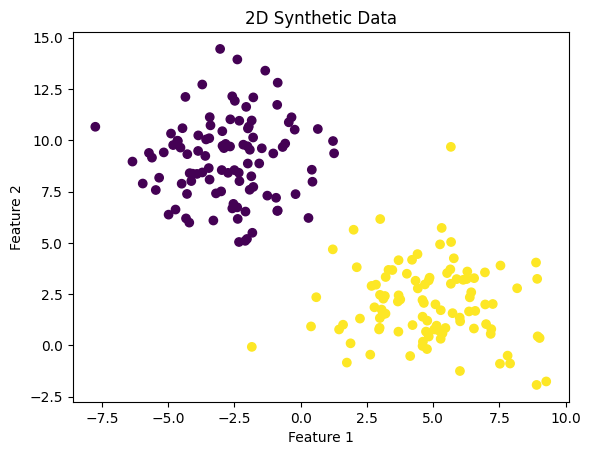

In [3]:

X, y = make_blobs(n_samples=200, centers=2, random_state=42, cluster_std=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("2D Synthetic Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
    


### Step 2: Implementing and Training KNN

Now we will implement a KNN model using `KNeighborsClassifier`. We'll use a simple value of k (number of neighbors) = 3.
    

In [12]:

knn = KNeighborsClassifier(...)
    

Accuracy: 100.00%


In [5]:

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
    

Accuracy: 100.00%



### Step 3: Visualizing the Decision Boundary

Let's visualize how KNN separates the classes. This is especially helpful for understanding decision boundaries in 2D space.
    

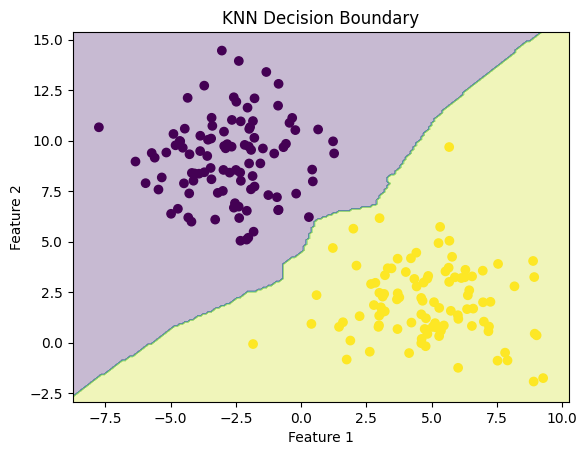

In [6]:

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("KNN Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
    

Now try to change the value of k and observe how the decision boundary changes. Also, change the parameters to generate more difficult datasets and observe the performance of KNN. 

## Part 2: Applying KNN to Chemical Datasets


### Step 4: Loading Chemical Datasets

We will load the `AcyclicDataset` and `MUTAGDataset` datasets.
    

In [7]:
from datasets.acyclic import AcyclicDataset
from datasets.tu_dataset import MutagDataset

acyclic = AcyclicDataset()
mutag = MutagDataset()
    

/home/bgauzere/.cache/pypoetry/virtualenvs/ia-pour-la-chimie-2XarQKld-py3.8/lib/python3.8/site-packages/torch_geometric/data/in_memory_dataset.py:284: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. The data of the dataset is already cached, so any modifications to `data` will not be reflected when accessing its elements. Clearing the cache now by removing all elements in `dataset._data_list`. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)



### Step 5: Preprocessing the Data

Each molecule in the dataset will be converted to a feature vector to be used with KNN. Features include the number of nodes, edges, and each atom types.
    

In [53]:
def mol_2_vec_mutag(molecule):
    num_nodes = len(molecule.nodes)
    num_edges = len(molecule.edges)
    atom_counts = np.zeros(7)
    for node in molecule.nodes:
        atom_counts += np.array(molecule.nodes[node]['x'],dtype=float)
    return [num_nodes, num_edges] + list(atom_counts)

# Check the transformation of first molecule in the MUTAG dataset


[17, 19, 14.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0]

In [ ]:
def mol_2_vec_mutag(molecule):
    num_nodes = len(molecule.nodes)
    num_edges = len(molecule.edges)
    atom_counts = np.zeros(7)
    for node in molecule.nodes:
        atom_counts += np.array(molecule.nodes[node]['x'],dtype=float)
    return [num_nodes, num_edges] + list(atom_counts)

# Check the transformation of first molecule in the MUTAG dataset
mol_2_vec_mutag(mutag.graphs[0])

[17, 19, 14.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0]

In [61]:
def mol_2_vec_acyclic(molecule):
    num_nodes = len(molecule.nodes)
    num_edges = len(molecule.edges)
    atom_counts = {'C': 0, 'S': 0, 'O': 0}
    for node in molecule.nodes:
        atom = molecule.nodes[node]['atom_symbol']
        atom_counts[atom] = atom_counts[atom]+1
    return [num_nodes, num_edges] + list(atom_counts.values())

## Check the transformation of the 135th molecule in the Acyclic dataset



[9, 8, 8, 1, 0]

In [ ]:
def mol_2_vec_acyclic(molecule):
    num_nodes = len(molecule.nodes)
    num_edges = len(molecule.edges)
    atom_counts = {'C': 0, 'S': 0, 'O': 0}
    for node in molecule.nodes:
        atom = molecule.nodes[node]['atom_symbol']
        atom_counts[atom] = atom_counts[atom]+1
    return [num_nodes, num_edges] + list(atom_counts.values())

## Check the transformation of the 135th molecule in the Acyclic dataset
mol_2_vec_acyclic(acyclic.graphs[134])


[9, 8, 8, 1, 0]

In [62]:
# Extract features for Acyclic and MUTAG datasets


In [ ]:
# Extract features for Acyclic and MUTAG datasets
X_acyclic = [mol_2_vec_acyclic(molecule) for molecule in acyclic.graphs]
y_acyclic = acyclic.targets

X_mutag = [mol_2_vec_mutag(molecule) for molecule in mutag.graphs]
y_mutag = mutag.targets
    


### Step 6: Training and Evaluating KNN on Chemical Data

Now, train and evaluate the KNN model on MUTAG Dataset. 
    

Evaluating on MUTAG Dataset:
Accuracy: 94.74%


In [ ]:
def train_evaluate_knn(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%")

# Evaluate on MUTAG dataset
print("Evaluating on MUTAG Dataset:")
train_evaluate_knn(X_mutag, y_mutag)
    

Evaluating on MUTAG Dataset:
Accuracy: 94.74%


### Step 7

Check the targets values of the Acyclic dataset. What kind of problem is it? What kind of metric would you use to evaluate the model?

Evaluating on Acyclic Dataset:
RMSE: 15.26


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

def train_evaluate_knn(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    knn = KNeighborsRegressor(n_neighbors=3)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = np.mean((y_test - y_pred) ** 2)
    print(f"RMSE: {np.sqrt(mse):.2f}")

print("Evaluating on Acyclic Dataset:")
train_evaluate_knn(X_acyclic, y_acyclic)

Evaluating on Acyclic Dataset:
RMSE: 15.26
